In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

link to the data: https://www.pxweb.bfs.admin.ch/pxweb/fr/px-x-0304010000_201/px-x-0304010000_201/px-x-0304010000_201.px


In [2]:
datapath = '/home/cyrill/dev/MASTER/vi-projet-inequality/data/12-22_suisse_sect26_tout_tout.csv'
df26 = pd.read_csv(datapath, sep=';', encoding='latin1')

# quick overview
print("Shape:", df26.shape)
print("\nColumn names:", df26.columns.tolist())
print("\nData types:", df26.dtypes)
print("\nMissing values:", df26.isnull().sum())

print("\n--- Sample Rows ---")
display(df26.head())

Shape: (720, 10)

Column names: ['Année', 'Grande région', 'Division économique', 'Position professionnelle', 'Sexe', 'Médiane', 'P10', 'P25', 'P75', 'P90']

Data types: Année                         int64
Grande région                object
Division économique          object
Position professionnelle     object
Sexe                         object
Médiane                     float64
P10                         float64
P25                         float64
P75                         float64
P90                         float64
dtype: object

Missing values: Année                        0
Grande région                0
Division économique          0
Position professionnelle     0
Sexe                         0
Médiane                     47
P10                         47
P25                         47
P75                         47
P90                         47
dtype: int64

--- Sample Rows ---


,Année,Grande région,Division économique,Position professionnelle,Sexe,Médiane,P10,P25,P75,P90
0,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Sexe - total,7365.0,4824.0,5779.0,9571.0,12464.0
1,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Femmes,6043.0,4286.0,4965.0,7824.0,10251.0
2,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Position professionnelle - total,Hommes,8073.0,5458.0,6500.0,10295.0,13362.0
3,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Sexe - total,12787.0,8017.0,9838.0,17098.0,24351.0
4,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Femmes,11911.0,6500.0,8720.0,16232.0,22738.0


In [3]:
# Convert data of type object to numeric
num_cols = ['Médiane', 'P10', 'P25', 'P75', 'P90']
for col in num_cols:
    df26[col] = pd.to_numeric(df26[col], errors="coerce").convert_dtypes()
    
print("\nNumeric conversion check:\n", df26[num_cols].dtypes)




Numeric conversion check:
 Médiane    Int64
P10        Int64
P25        Int64
P75        Int64
P90        Int64
dtype: object


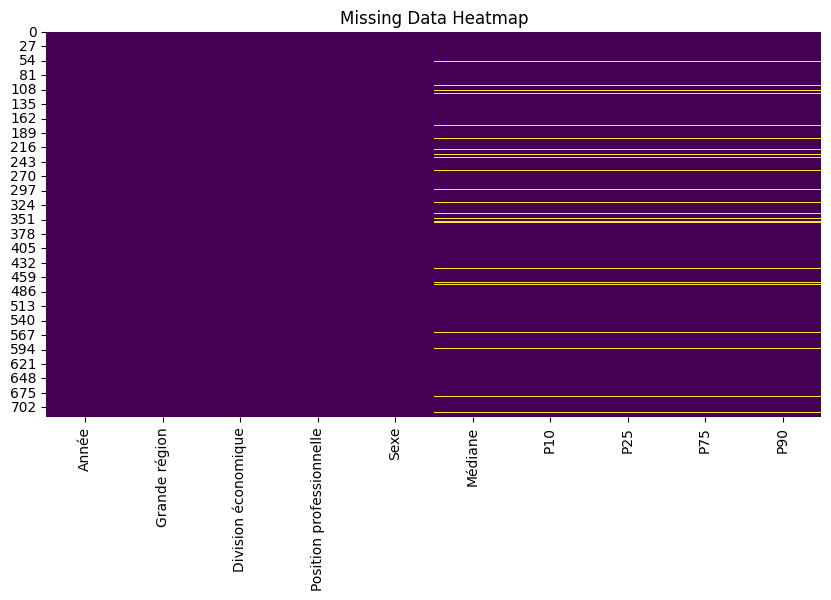

In [4]:
# --- 6. Missing Data Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(df26.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
# Median values exploration
# make subplot for 4 plots

#TODO: boxplot corrections:
# - for Gender distributions: take Suisse-total, position_total
gender_mask_h = ((df26["Grande région"] == "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Hommes"))
gender_mask_f = ((df26["Grande région"] == "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Femmes"))

# optional: repeat for median, P10, P25, P75, P90 -> does this make sense or we have it already?
# put a phrase above each plot to explain what is looked at
# for other distributiosn: double each for women and men
# - for region distribution: take position_total
region_mask_h = ((df26["Grande région"] != "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Hommes"))
region_mask_f = ((df26["Grande région"] != "Suisse") & (df26["Position professionnelle"] == "Position professionnelle - total") & (df26["Sexe"]=="Femmes"))
# - for position distribution: take region_total
position_mask_h = ((df26["Position professionnelle"] != "Position professionnelle - total") & (df26["Grande région"] == "Suisse") & (df26["Sexe"]=="Hommes"))
position_mask_f = ((df26["Position professionnelle"] != "Position professionnelle - total") & (df26["Grande région"] == "Suisse") & (df26["Sexe"]=="Femmes"))


df1 = df26.loc[position_mask_h]
df1



,Année,Grande région,Division économique,Position professionnelle,Sexe,Médiane,P10,P25,P75,P90
5,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Hommes,12951,8336,10071,17294,24861
8,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre inférieur,Hommes,10001,7282,8385,11951,14176
11,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Responsable de l'exécution des travaux,Hommes,8571,5994,7014,10400,11821
14,2022,Suisse,"> 26 Fabrication de produit informatiques, éle...",Sans fonction de cadre,Hommes,7336,5223,6093,8995,11024
125,2020,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Hommes,11580,7239,9003,14952,19765
128,2020,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre inférieur,Hommes,9697,7059,8156,11310,13266
131,2020,Suisse,"> 26 Fabrication de produit informatiques, éle...",Responsable de l'exécution des travaux,Hommes,8171,5961,6832,9697,11066
134,2020,Suisse,"> 26 Fabrication de produit informatiques, éle...",Sans fonction de cadre,Hommes,6963,4989,5785,8417,10134
245,2018,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre supérieur et moyen,Hommes,12194,8095,9936,15854,22409
248,2018,Suisse,"> 26 Fabrication de produit informatiques, éle...",Cadre inférieur,Hommes,9890,7193,8374,11524,13396


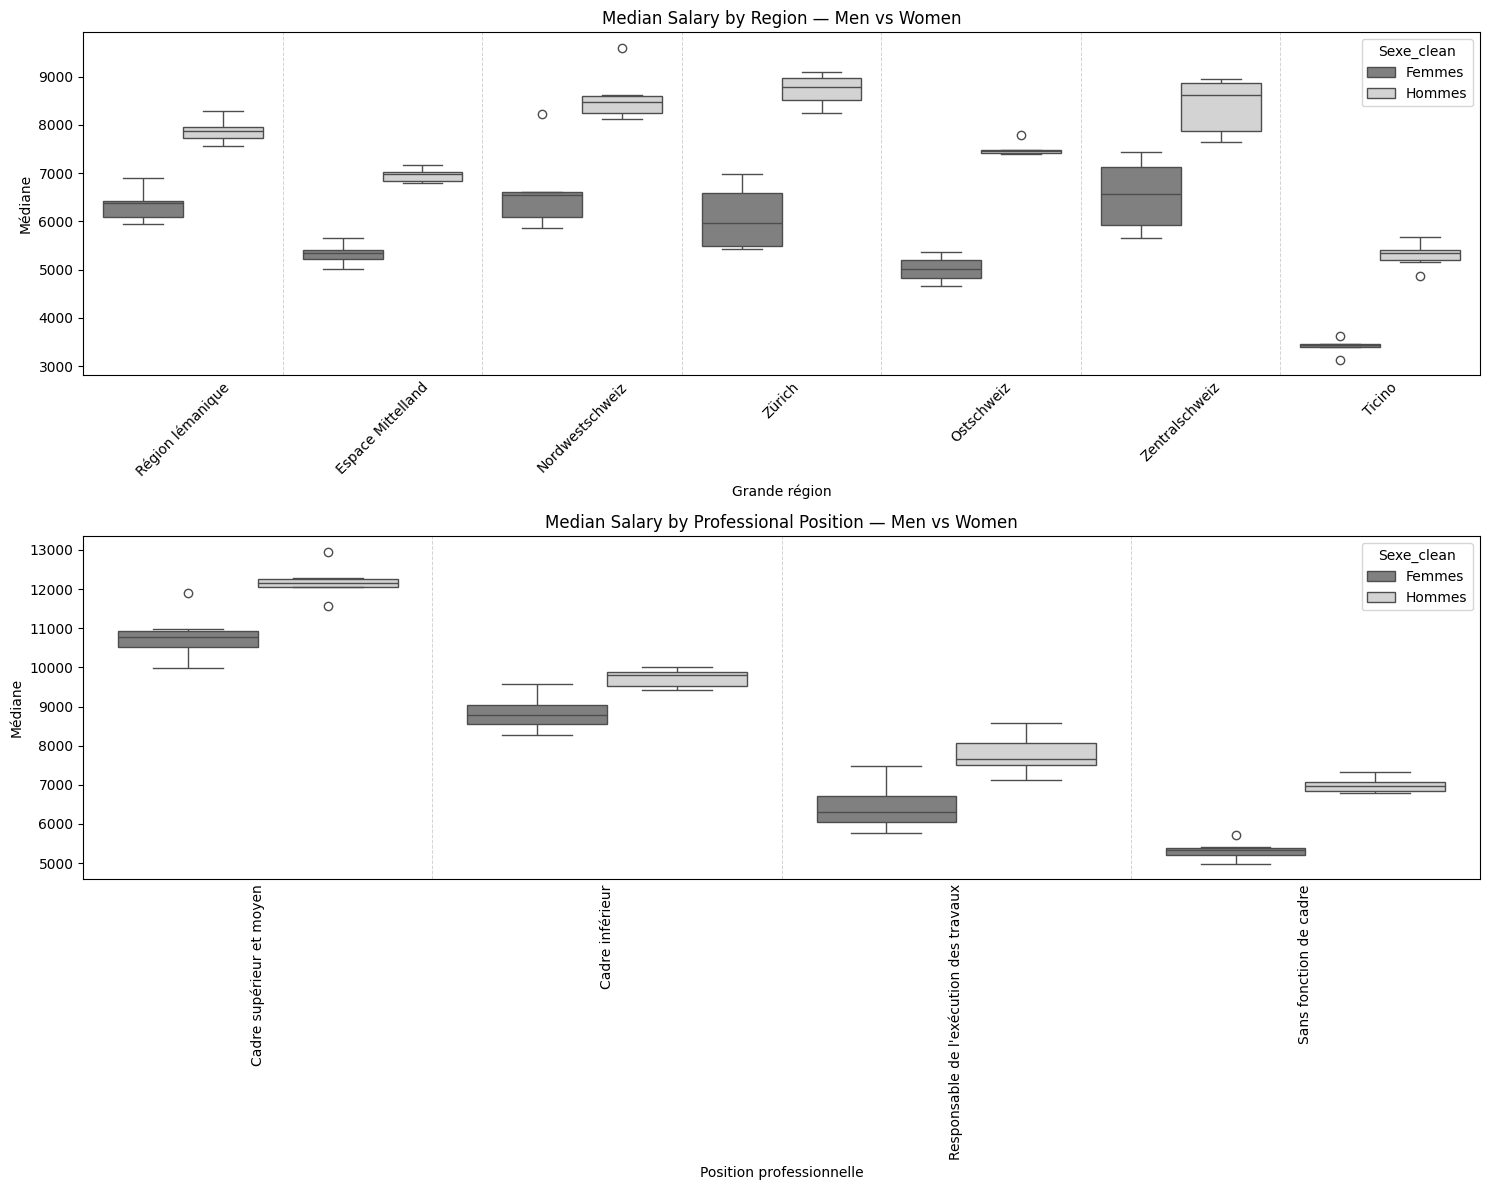

In [6]:
df26["Sexe_clean"] = df26["Sexe"].map({"Hommes": "Hommes", "Femmes": "Femmes"})

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

# ---------------------- Helper for separator lines ----------------------
def add_category_separators(ax):
    categories = ax.get_xticks()
    for c in categories:
        ax.axvline(c + 0.5, color="lightgray", linestyle="--", linewidth=0.7)
    ax.tick_params(axis='x', length=0)   # remove tiny ticks

# ---------------------- 1) REGION distribution ----------------------
plt.subplot(2, 1, 1)
df_region = df26.loc[region_mask_h | region_mask_f]

ax1 = sns.boxplot(
    data=df_region,
    x="Grande région",
    y="Médiane",
    hue="Sexe_clean",
    palette=["gray", "lightgray"]
)
add_category_separators(ax1)

plt.title("Median Salary by Region — Men vs Women")
plt.xticks(rotation=45)

# ---------------------- 2) POSITION distribution ----------------------
plt.subplot(2, 1, 2)
df_position = df26.loc[position_mask_h | position_mask_f]

ax2 = sns.boxplot(
    data=df_position,
    x="Position professionnelle",
    y="Médiane",
    hue="Sexe_clean",
    palette=["gray", "lightgray"]
)
add_category_separators(ax2)

plt.title("Median Salary by Professional Position — Men vs Women")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Feature Engineering

In [7]:
df26_columns = df26.columns.tolist()
df26_columns = df26_columns[0:6]

In [8]:
# calculating inequality for each case
# 1. find indexes i of all 'Femmes'
# 2. compute inequality percentage by makein inequality[i] = médiane[i](femmes) / médiane [i+1](hommes)

pivot_df26 = df26.pivot_table(
    index=['Grande région', 'Année', 'Position professionnelle'],
    columns='Sexe',    # take uniques from 'Sexe' as columns
    values=['Médiane', 'P10', 'P25', 'P75', 'P90']   # put values 'Médiane' form table into the new columns from 'Sexe'
).reset_index()
# Drop total-sex columns
cols_to_drop = [
    ('Médiane', 'Sexe - total'),
    ('P10', 'Sexe - total'),
    ('P25', 'Sexe - total'),
    ('P75', 'Sexe - total'),
    ('P90', 'Sexe - total')
]
pivot_df26.drop(columns=cols_to_drop, inplace=True, errors='ignore')
#pivot_df26['inequality_%'] = ((pivot_df26['Femmes'] / pivot_df26['Hommes']) * 100 - 100).round(2)

# Compute inequality for each percentile (Femmes / Hommes - 1) * 100
for col in ['Médiane', 'P10', 'P25', 'P75', 'P90']:
    femmes_col = (col, 'Femmes')
    hommes_col = (col, 'Hommes')
    ineq_col = (f'Inequality_{col}', '%')
    pivot_df26[ineq_col] = ((pivot_df26[femmes_col] / pivot_df26[hommes_col]) * 100 - 100).round(2)
pivot_df26.columns = ['_'.join(filter(None, col)).strip() for col in pivot_df26.columns.values]


pivot_df26.head()


,Grande région,Année,Position professionnelle,Médiane_Femmes,Médiane_Hommes,P10_Femmes,P10_Hommes,P25_Femmes,P25_Hommes,P75_Femmes,P75_Hommes,P90_Femmes,P90_Hommes,Inequality_Médiane_%,Inequality_P10_%,Inequality_P25_%,Inequality_P75_%,Inequality_P90_%
0,Espace Mittelland,2012,Cadre inférieur,7966.0,8800.0,5653.0,6784.0,6787.0,7643.0,9093.0,10373.0,10854.0,12135.0,-9.48,-16.67,-11.2,-12.34,-10.56
1,Espace Mittelland,2012,Cadre supérieur et moyen,10075.0,11602.0,6258.0,7356.0,7469.0,9327.0,12828.0,15202.0,15928.0,20424.0,-13.16,-14.93,-19.92,-15.62,-22.01
2,Espace Mittelland,2012,Position professionnelle - total,5023.0,6790.0,3978.0,4745.0,4453.0,5527.0,5932.0,8612.0,7383.0,11277.0,-26.02,-16.16,-19.43,-31.12,-34.53
3,Espace Mittelland,2012,Responsable de l'exécution des travaux,5725.0,6967.0,4247.0,5142.0,4910.0,6038.0,6638.0,8123.0,7776.0,9740.0,-17.83,-17.41,-18.68,-18.28,-20.16
4,Espace Mittelland,2012,Sans fonction de cadre,4917.0,6068.0,3952.0,4514.0,4409.0,5176.0,5604.0,7221.0,6611.0,8501.0,-18.97,-12.45,-14.82,-22.39,-22.23


#### Idea How to construct data that represents "inequality":

we have the following data for each year and region:

median, P10, P25, P75 and P90 for each of position.
1. use **MAP** for **REGIONS**
2. use **SCROLLER** for **YEAR**
3. use a **DROPDOWN** menu for the **POSITION**

then use a **COLOR** to visualize the **MEDIAN** of inequality.

First, only use the MEDIAN values:
i need a inequality-value for each combination of YEAR x REGION X POSITION. This makes 6 x 7 x 4 =  168 values.

In [9]:
# dataframe for only year 2012 and position Cadre Inférérieur
df26_2012_cadre_inf = pivot_df26[
    (pivot_df26['Année'] == 2012) &
    (pivot_df26['Position professionnelle'] == 'Cadre inférieur')
][['Grande région', 'Inequality_Médiane_%']]

## merge this with the geo data in app.py
# -> ge_df...

In [10]:
# find uniques in column 'Année'
years = df26['Année'].unique().tolist()
regions = [r for r in df26['Grande région'].unique() if r != "Suisse"]
positions = [p for p in df26['Position professionnelle'].unique() if p != "Position professionnelle - total"]

In [ ]:
# initialize an empty dataframe with columns: Year, Region, Position, inequality_%
df_inequality = pd.DataFrame(columns=['Year', 'Region', 'Position', 'Inequality'])
# loop over years, regions and positions
for year in years:
    for region in regions:
        for position in positions:
            med_salary_f = df26.loc[(df26["Année"] == year) &
                                    (df26["Grande région"] == region) &
                                    (df26["Position professionnelle"] == position) &
                                    (df26["Sexe"] == "Femmes"), "Médiane"].values
            med_salary_h = df26.loc[(df26["Année"] == year) &
                                    (df26["Grande région"] == region) &
                                    (df26["Position professionnelle"] == position) &
                                    (df26["Sexe"] == "Hommes"), "Médiane"].values
            inequality_pct = ((med_salary_h - med_salary_f) / med_salary_h * 100).round(2)[0]
                
            # append to df_inequality
            df_inequality = pd.concat([
                df_inequality, 
                pd.DataFrame({
                    'Year': [year],
                    'Region': [region],
                    'Position': [position],
                    'Inequality': [inequality_pct]
                })
            ], ignore_index=True)

/tmp/ipykernel_59077/3437054392.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_inequality = pd.concat([
/tmp/ipykernel_59077/3437054392.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_inequality = pd.concat([
/tmp/ipykernel_59077/3437054392.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior,

In [12]:
print(df_inequality.shape)
print(df_inequality.head())

(168, 5)
   Year             Region                                Position  \
0  2022   Région lémanique                Cadre supérieur et moyen   
1  2022   Région lémanique                         Cadre inférieur   
2  2022   Région lémanique  Responsable de l'exécution des travaux   
3  2022   Région lémanique                  Sans fonction de cadre   
4  2022  Espace Mittelland                Cadre supérieur et moyen   

  Inequality_%  Inequality  
0          NaN        5.90  
1          NaN        3.60  
2          NaN        3.79  
3          NaN       14.30  
4          NaN        3.68  


In [13]:
df_inequality.to_csv('../data/inequality_by_region_position_year.csv', index=False)

In [14]:
dfinq = pd.read_csv('../data/inequality_by_region_position_year.csv')
dfinq.loc[(dfinq["Year"] == 2022) & (dfinq["Position"] == "Sans fonction de cadre")]
# dfinq.head()

,Year,Region,Position,Inequality_%,Inequality
3,2022,Région lémanique,Sans fonction de cadre,NaN,14.30
7,2022,Espace Mittelland,Sans fonction de cadre,NaN,16.16
11,2022,Nordwestschweiz,Sans fonction de cadre,NaN,15.67
15,2022,Zürich,Sans fonction de cadre,NaN,23.54
19,2022,Ostschweiz,Sans fonction de cadre,NaN,27.69
23,2022,Zentralschweiz,Sans fonction de cadre,NaN,22.34
27,2022,Ticino,Sans fonction de cadre,NaN,18.81
